In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('Expander_data.csv')

In [3]:
data_set.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


In [5]:
data_set['Run Status'].isnull().sum()

296450

In [6]:
data_set.drop('Run Status', axis=1, inplace=True)

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 8 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
dtypes: float64(7), object(1)
memory usage: 18.1+ MB


In [8]:
data_set['Timestamp'] = pd.to_datetime(data_set['Timestamp'])

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 8 columns):
Timestamp                     296450 non-null datetime64[ns]
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 18.1 MB


In [10]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Suction Pressure (psig),296450.0,590.541350,23.216552,552.420048,572.757269,586.491792,605.986608,649.217417
Suction Temperature (F),296450.0,-231.564934,3.574107,-238.594971,-234.171427,-230.922352,-229.585168,-223.440125
Total Flow (gpm),296450.0,8119.917777,398.049531,7056.004500,7916.322054,8144.161813,8388.610374,8975.986378
Speed (rpm),296450.0,2955.416695,54.201467,2835.750571,2906.336126,2961.788792,3000.863611,3090.367995
By-pass Valve Position (%),296450.0,2.005667,2.488568,-0.200000,0.000000,0.000000,4.000000,8.026667
Discharge Pressure (psig),296450.0,186.991087,56.205183,69.983885,143.468467,183.270451,223.580205,324.411576
Discharge Temperature (F),296450.0,-229.764934,3.574136,-236.816223,-232.371760,-229.122946,-227.785796,-221.617102


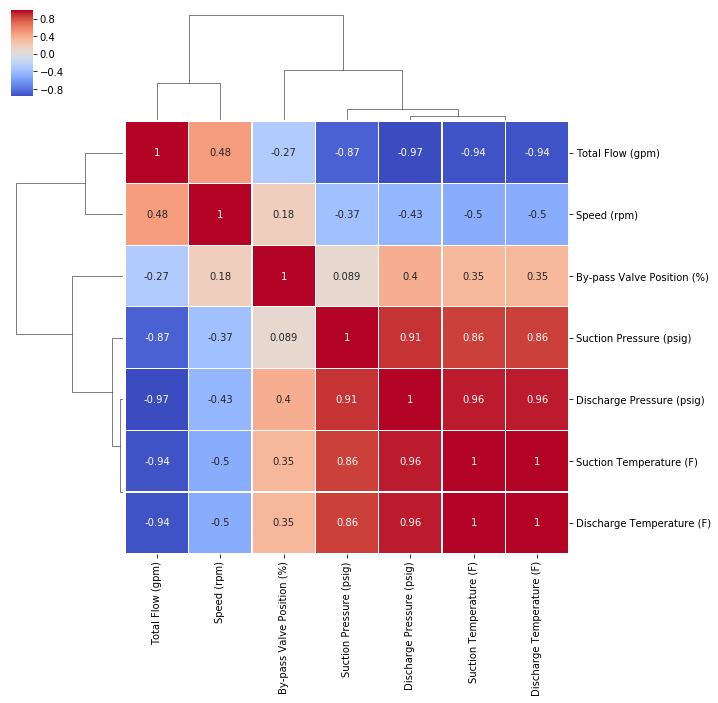

In [11]:
cg = sns.clustermap(data_set.corr(), annot=True ,cmap ="coolwarm", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg;

In [12]:
# sns.heatmap(data_set.corr(), annot=True, cmap='coolwarm')

In [13]:
from statsmodels.api import OLS, add_constant

In [14]:
x = data_set.drop(['Timestamp','Discharge Pressure (psig)'], axis=1)
y = data_set['Discharge Pressure (psig)']

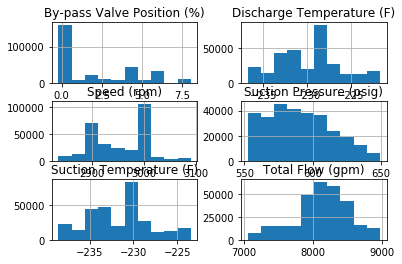

In [16]:
x.hist();

In [17]:
x_cost = add_constant(x)

D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
model = OLS(y, x_cost).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared:                       0.998
Model:                                   OLS   Adj. R-squared:                  0.998
Method:                        Least Squares   F-statistic:                 2.581e+07
Date:                       Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                               11:12:47   Log-Likelihood:            -6.8711e+05
No. Observations:                     296450   AIC:                         1.374e+06
Df Residuals:                         296443   BIC:                         1.374e+06
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        626.2110      1.176    532.438      0.000     623.906     628.516
Suction Pressure (psig)        0.9062      0.001   1799.565      0.000       0.905       0.907
Suction Temperature (F)        0.9967      0.340      2.935      0.003       0.331       1.662
Total Flow (gpm)              -0.0704   3.56e-05  -1979.385      0.000      -0.071      -0.070
Speed (rpm)                   -0.0645      0.000   -546.989      0.000      -0.065      -0.064
By-pass Valve Position (%)     4.9617      0.003   1899.047      0.000       4.957       4.967
Discharge Temperature (F)     -0.0393      0.340     -0.116      0.908      -0.705       0.626
==============================================================================
Omnibus:                    44290.227   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87854.078
Skew:                          -0.927   Prob(JB):                         0.00
Kurtosis:                       4.918   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.mse_resid

6.036000621558704

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state =42)

In [23]:
from sklearn.linear_model import LinearRegression

## Model 2

In [24]:
LR = LinearRegression()

In [25]:
LR.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
LR.score(xtrain, ytrain)

0.9980875147377224

In [27]:
LR.score(xtest, ytest)

0.9980935135007686

In [28]:
ypred = LR.predict(xtest)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
np.sqrt(mean_squared_error(ytest, ypred))

2.4530035082127326

# Rmse 2.4530035082127326

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state =42)

xtrain_scale = pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns)
xtest_scale = pd.DataFrame(sc.transform(xtest), columns=xtest.columns)


## Model 3

In [35]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(xtrain_scale, ytrain)

print(LR.score(xtrain_scale, ytrain))

print(LR.score(xtest_scale, ytest))

ypred = LR.predict(xtest_scale)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(ytest, ypred))

0.9980875147377224
0.9980935135007686


2.4530035082127357

# RFE

In [36]:
from sklearn.feature_selection import RFE

In [37]:
rfe_model = RFE(LR, 5)
x_rfe = rfe_model.fit_transform(xtrain_scale, ytrain)
rfe_model.support_

array([ True,  True,  True,  True,  True, False])

In [38]:
xtrain_scale.columns

Index(['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Temperature (F)'],
      dtype='object')

In [39]:
rfe_frame = pd.DataFrame(xtrain_scale.columns, columns=['columns'])
rfe_frame['Rank'] = rfe_model.support_
rfe_result = rfe_frame[rfe_frame['Rank']==True]['columns'].tolist()

In [40]:
rfe_result

['Suction Pressure (psig)',
 'Suction Temperature (F)',
 'Total Flow (gpm)',
 'Speed (rpm)',
 'By-pass Valve Position (%)']

In [41]:
LR.fit(x_rfe, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
x_rfe.shape

(207515, 5)

In [43]:
LR.score(x_rfe, ytrain)

0.9980875144989089

In [44]:
x_rfe

array([[ 0.85405595,  0.47456646, -0.2474427 , -0.39425878, -0.80601242],
       [ 1.91830545,  2.05967767, -1.82109232, -0.87817113,  2.40871312],
       [ 0.2077237 ,  0.3873306 , -0.10432986,  0.75773036,  1.60503173],
       ...,
       [ 0.87476098,  0.76950874, -1.13229413, -0.9762901 , -0.80601242],
       [ 0.78358341,  0.56751571, -0.06236251, -0.79596253, -0.80601242],
       [ 1.19366735,  0.75994167, -0.83836706, -0.83123155, -0.80601242]])

In [45]:
# LR.score(xtest_scale.iloc[:,:-1], ytest)
LR.score(xtest_scale[rfe_result], ytest)


0.9980935138888788

In [46]:
ypred = LR.predict(xtest_scale[rfe_result])

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(ytest, ypred))

2.453003258529334

In [47]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = add_constant(X_1)
    model = OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Suction Pressure (psig)', 'Suction Temperature (F)', 'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)']


In [48]:
residual = ytest - ypred
residual = residual.values
residual

array([-1.29545246,  0.9501342 , -0.07816141, ..., -1.93793659,
       -0.6566999 , -0.92230372])

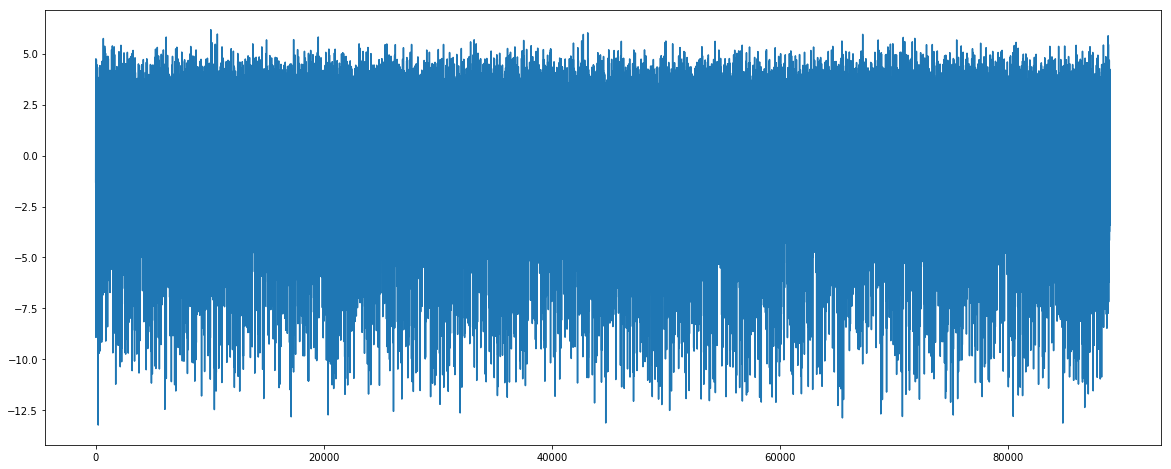

In [49]:
plt.figure(figsize=(20,8))
sns.lineplot(data=residual)

### Linearity

In [60]:
# plt.figure(figsize=(15,8))
# sns.regplot(ytest, pred, line_kws={'color': 'red'})

In [61]:
# plt.figure(figsize=(15,8))
# sns.regplot(pred, residual, line_kws={'color': 'red'})

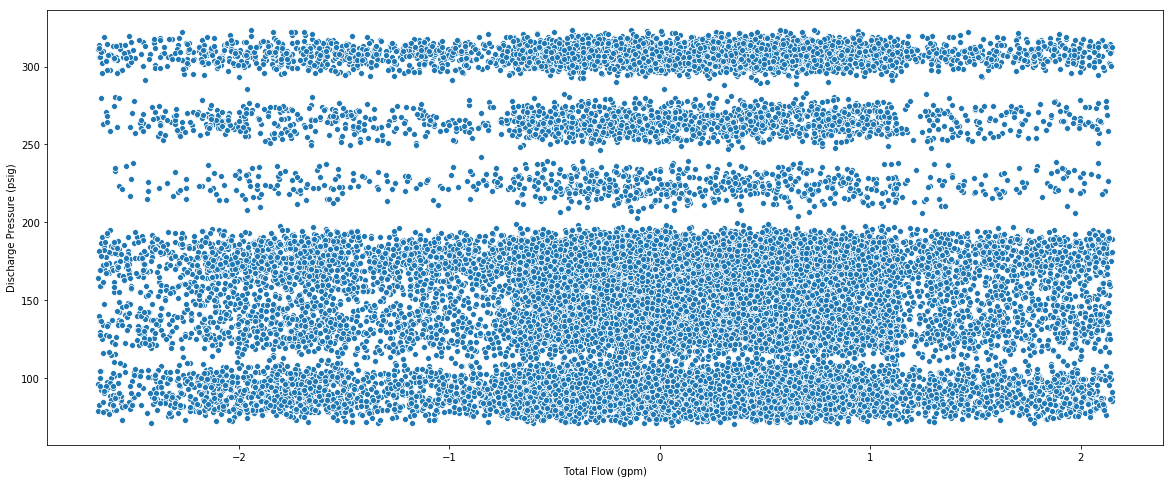

In [62]:
plt.figure(figsize=(20,8))
sns.scatterplot(xtest_scale['Total Flow (gpm)'], ytest)

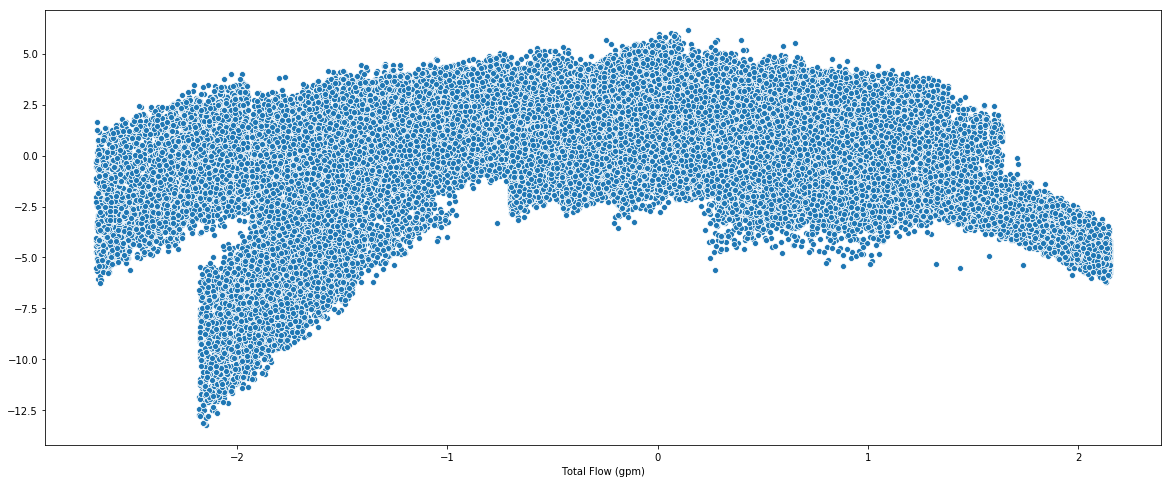

In [63]:
plt.figure(figsize=(20,8))
sns.scatterplot(xtest_scale['Total Flow (gpm)'], residual)

In [64]:
#Curv pattern is found

### Independence of errors or Autocorrelation

In [65]:
ytest.shape

(88935,)

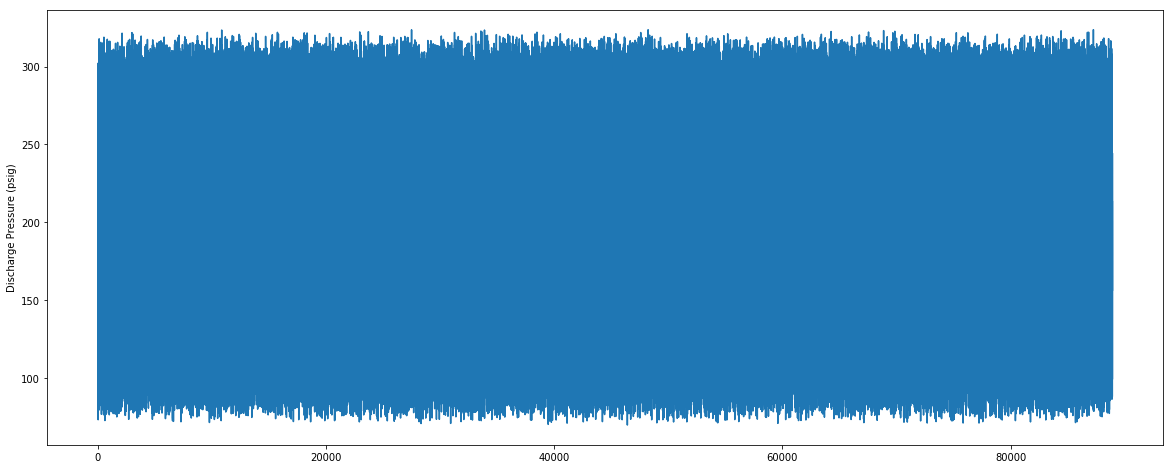

In [66]:
plt.figure(figsize=(20,8))
sns.lineplot(range(0,ytest.shape[0]), ytest)

In [67]:
# No Autocorrelation

### Normality

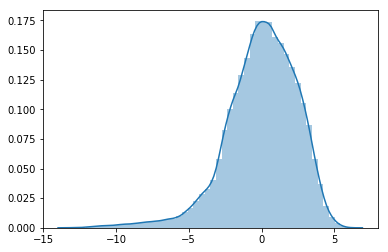

In [68]:
sns.distplot(residual)

In [69]:
#Normaliy distributed

### Equal variance or Homoscedasticity

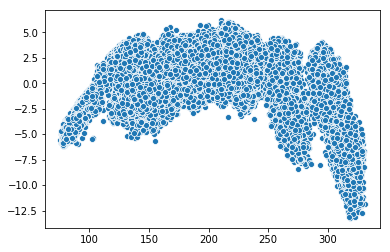

In [70]:
sns.scatterplot(ypred, residual)

In [71]:
# Hetroscedasticity does not exists

In [72]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 8 columns):
Timestamp                     296450 non-null datetime64[ns]
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 18.1 MB


In [73]:
data_set['Months'] = pd.DatetimeIndex(data_set['Timestamp']).month
data_set['Days'] = pd.DatetimeIndex(data_set['Timestamp']).day

In [74]:
np.unique(data_set['By-pass Valve Position (%)']).size

46504

In [75]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 10 columns):
Timestamp                     296450 non-null datetime64[ns]
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Months                        296450 non-null int64
Days                          296450 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 22.6 MB


In [77]:
data_set['Months'] = data_set['Months'].astype(object)
data_set['Days'] = data_set['Days'].astype(object)

In [78]:
obj_dum = pd.get_dummies(data_set[['Months', 'Days']], drop_first=True)

In [79]:
updated = pd.concat([data_set.drop(['Timestamp', 'Months', 'Days'], axis=1),obj_dum], axis=1)

In [80]:
x = updated.drop(['Discharge Pressure (psig)','Discharge Temperature (F)'], axis=1)
y = updated['Discharge Pressure (psig)']

In [81]:
updated.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Months_2,Months_3,Months_4,...,Days_22,Days_23,Days_24,Days_25,Days_26,Days_27,Days_28,Days_29,Days_30,Days_31
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
updated.columns

Index(['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Pressure (psig)', 'Discharge Temperature (F)', 'Months_2',
       'Months_3', 'Months_4', 'Days_2', 'Days_3', 'Days_4', 'Days_5',
       'Days_6', 'Days_7', 'Days_8', 'Days_9', 'Days_10', 'Days_11', 'Days_12',
       'Days_13', 'Days_14', 'Days_15', 'Days_16', 'Days_17', 'Days_18',
       'Days_19', 'Days_20', 'Days_21', 'Days_22', 'Days_23', 'Days_24',
       'Days_25', 'Days_26', 'Days_27', 'Days_28', 'Days_29', 'Days_30',
       'Days_31'],
      dtype='object')

## Model 4 with New two columns days and months

In [83]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state =42)

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(xtrain, ytrain)

print('train Score:', LR.score(xtrain, ytrain))

print('test score:', LR.score(xtest, ytest))

ypred = LR.predict(xtest)

from sklearn.metrics import mean_squared_error, r2_score

print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)))
print('R squared :',(r2_score(ytest,ypred)))

train Score: 0.9988888403737983
test score: 0.9988996890931253
RMSE: 1.8635412533654194
R squared : 0.9988996890931253


# RMSE: 1.8635412533654194

In [84]:
sc = StandardScaler()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state =42)

xtrain_scale = pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns)
xtest_scale = pd.DataFrame(sc.transform(xtest), columns=xtest.columns)

In [85]:
## Model 3
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(xtrain_scale, ytrain)

print(LR.score(xtrain_scale, ytrain))

print(LR.score(xtest_scale, ytest))

ypred = LR.predict(xtest_scale)



print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)))
print('R squared :',(r2_score(ytest,ypred)))

0.9988888403737983
0.9988996890931253
RMSE: 1.8635412533654236
R squared : 0.9988996890931253


# RMSE: 1.8635412533654236

In [86]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [87]:
L = Lasso(alpha=0.0021)
L.fit(xtrain_scale, ytrain)
print('R^2 train:', L.score(xtrain_scale, ytrain))
print('R^2 test:', L.score(xtest_scale, ytest))
y_pred = L.predict(xtest_scale)
print('R squared :',(r2_score(ytest,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(ytest,y_pred)))

R^2 train: 0.9988885713746578
R^2 test: 0.9988992388501855
R squared : 0.9988992388501855
RMSE : 1.8639224912824053


In [88]:
R = Ridge(alpha=1)
R.fit(xtrain_scale, ytrain)
print('R^2 train:', R.score(xtrain_scale, ytrain))
print('R^2 test:', R.score(xtest_scale, ytest))
y_pred = R.predict(xtest_scale)
print('R squared :',(r2_score(ytest,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(ytest,y_pred)))

R^2 train: 0.9988888402396542
R^2 test: 0.9988996870625504
R squared : 0.9988996870625505
RMSE : 1.8635429729058977


In [89]:
E = ElasticNet(alpha=0.001)
E.fit(xtrain_scale, ytrain)
print('R^2 train:', E.score(xtrain_scale, ytrain))
print('R^2 test:', E.score(xtest_scale, ytest))
y_pred = E.predict(xtest_scale)
print('R squared :',(r2_score(ytest,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(ytest,y_pred)))

R^2 train: 0.9988873812610525
R^2 test: 0.9988980079378024
R squared : 0.9988980079378025
RMSE : 1.86496435410347


## Polinomial Model

In [90]:
x = updated.drop(['Discharge Pressure (psig)','Discharge Temperature (F)'], axis=1)
y = updated['Discharge Pressure (psig)']

In [91]:
x.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Months_2,Months_3,Months_4,Days_2,Days_3,...,Days_22,Days_23,Days_24,Days_25,Days_26,Days_27,Days_28,Days_29,Days_30,Days_31
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
sc = StandardScaler()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state =42)
# xtrain_scale = pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns)
# xtest_scale = pd.DataFrame(sc.transform(xtest), columns=xtest.columns)

In [93]:
# pd.DataFrame(sc.transform(xtest), columns=xtest.columns).iloc[:,:5]

In [94]:
# np.concatenate((xtrain.iloc[:,5:].to_numpy(), p_train), axis=1)

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
p = PolynomialFeatures(degree=2)
p_train = p.fit_transform(pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns).iloc[:,:5])
# xtrain.iloc[:,:5].head()
p_train = np.concatenate((xtrain.iloc[:,5:].to_numpy(), p_train), axis=1)
P_LR = LinearRegression()
P_LR.fit(p_train, ytrain)
p_test = p.transform(pd.DataFrame(sc.transform(xtest), columns=xtest.columns).iloc[:,:5])
p_test = np.concatenate((xtest.iloc[:,5:].to_numpy(), p_test), axis=1)
print('R^2 train:', P_LR.score(p_train, ytrain))
print('R^2 test:', P_LR.score(p_test, ytest))
poly_pred=P_LR.predict(p_test)
rmse = np.sqrt(mean_squared_error(ytest,poly_pred))
print('RMSE (Polynomial with degree 2) :',rmse)

R^2 train: 0.9995246755119405
R^2 test: 0.999527840945121
RMSE (Polynomial with degree 2) : 1.2207464321444323


# RMSE (Polynomial with degree 2) : 1.2207464321444323

In [98]:
p = PolynomialFeatures(degree=3)
p_train = p.fit_transform(pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns).iloc[:,:5])
# xtrain.iloc[:,:5].head()
p_train = np.concatenate((xtrain.iloc[:,5:].to_numpy(), p_train), axis=1)
P_LR = LinearRegression()
P_LR.fit(p_train, ytrain)
p_test = p.transform(pd.DataFrame(sc.transform(xtest), columns=xtest.columns).iloc[:,:5])
p_test = np.concatenate((xtest.iloc[:,5:].to_numpy(), p_test), axis=1)
print('R^2 train:', P_LR.score(p_train, ytrain))
print('R^2 test:', P_LR.score(p_test, ytest))
poly_pred=P_LR.predict(p_test)
rmse = np.sqrt(mean_squared_error(ytest,poly_pred))
print('RMSE (Polynomial with degree 2) :',rmse)

R^2 train: 0.9995263041862708
R^2 test: 0.9995291727033381
RMSE (Polynomial with degree 2) : 1.2190236153595866


# AS Degree of Polynomial Increases Rmse decreases in small scale of decimal points.

## So my Least RMSE is 1.2190236153595866 with Polynomial degree of 3